<a href="https://colab.research.google.com/github/chuangchai49097/data_viz_2022/blob/main/BasicPython%26DataViz_midterm2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาใช้ข้อมูลจากตาราง confirmed_case.xlsx (จาก https://drive.google.com/drive/folders/1OmjM8ZgkEb10C4ZN44f-JxiBFaBwbWaM?usp=sharing) และข้อมูลจากตาราง
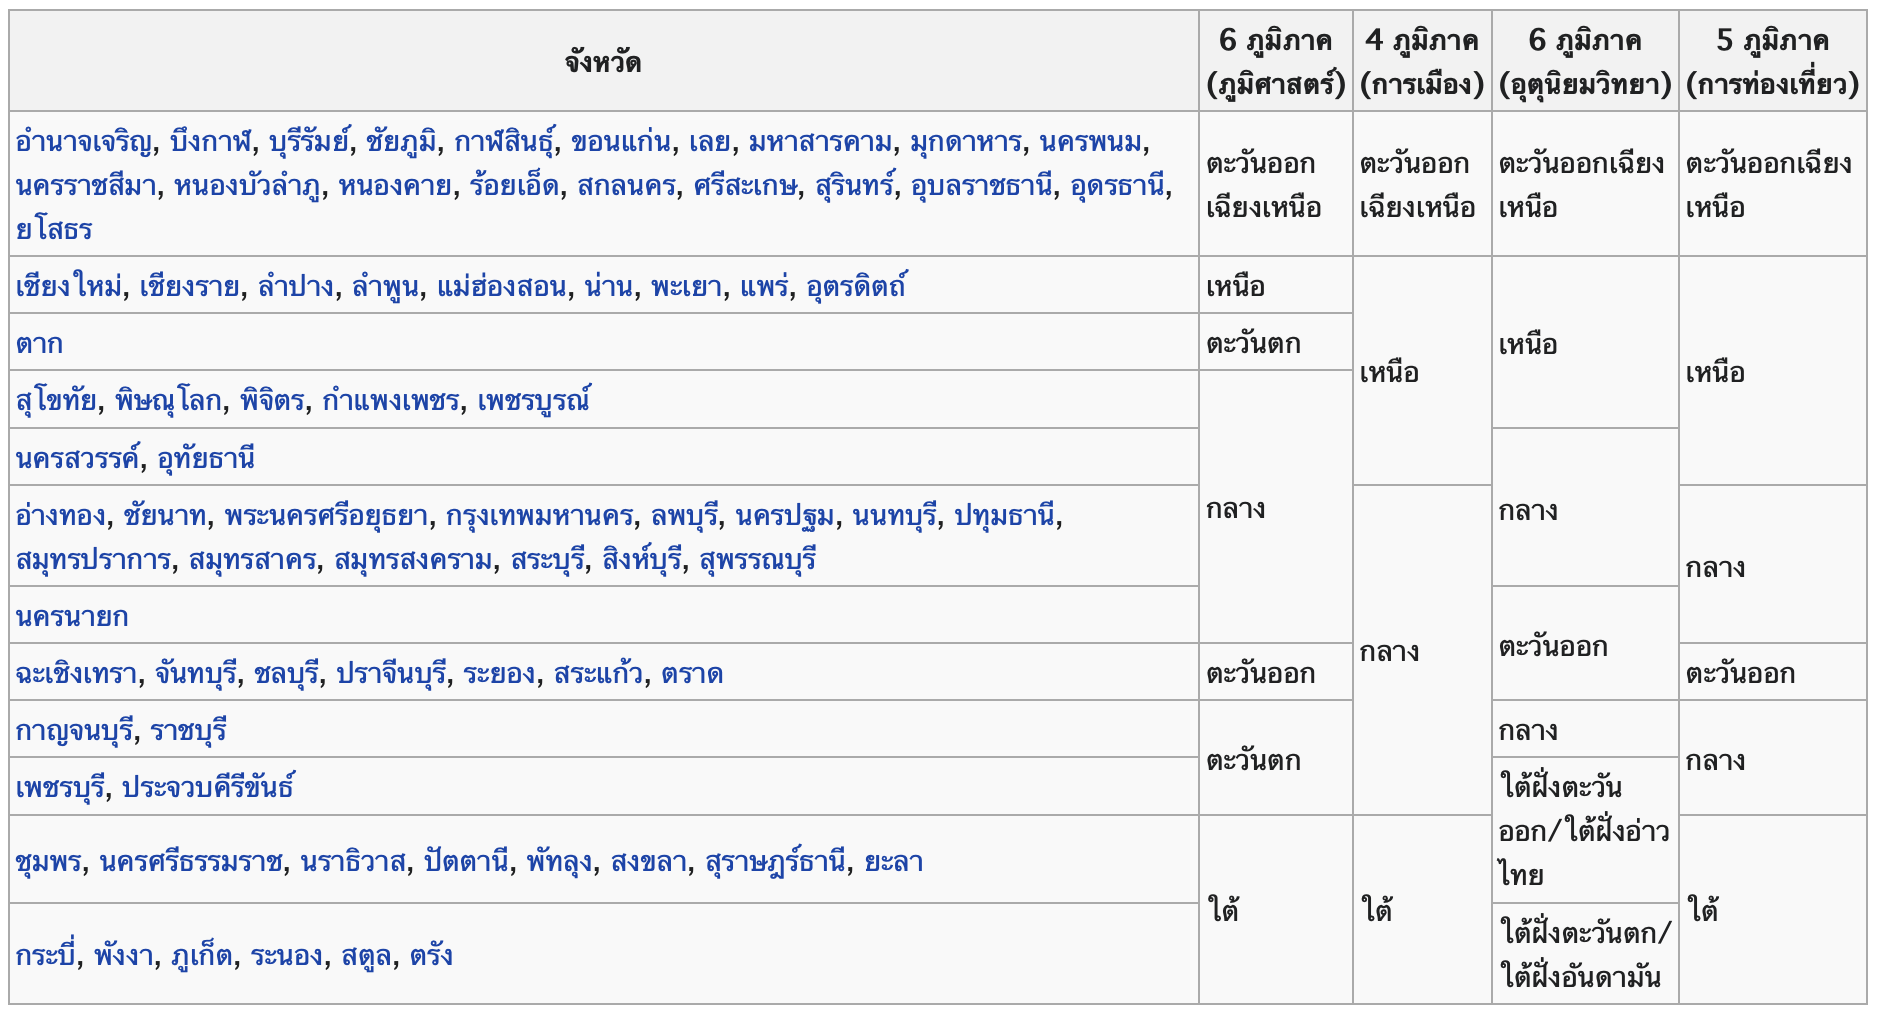

ตอบคำถามต่อไปนี้ (โดยแสดงของการจัดภูมิภาคทั้ง 4 แบบ ภูมิศาสตร์ การเมือง อุตุนิยมวิทยา และ การท่องเที่ยว)
**คะแนนเต็ม 100 คะแนน โดยคะแนน
Midterm คิดเป็น 30% ของคะแนนทั้งหมด**

เตรียมข้อมูล (20 คะแนน)

1. อายุของผู้ป่วยคนแรกในแต่ละภูมิภาค (เหนือ, กลาง, ใต้, ...) (20 คะแนน)

2. เปรียบเทียบจำนวนผู้ป่วยในแต่ละภูมิภาค (ภูมิภาคใดมีจำนวนผู้ป่วยมากที่สุด และ น้อยที่สุด) (20 คะแนน)

3. แสดง Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของแต่ละภูมิภาค (20 คะแนน)

4. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัด (province of onset) (20 คะแนน)

5. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภูมิภาค (20 คะแนน)

มีอะไรสามารถโพสสอบถามได้ใน facebook group ภายใต้โพสของข้อสอบนี้

(คะแนน midterm เป็นคะแนนกลุ่ม)

## อัพโหลดข้อมูลจาก Drive

In [ ]:
import pandas as pd     # pandas ใช้จัดการข้อมูลที่เป็นตาราง
import os       # os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน

In [ ]:
from google.colab import drive      # ชี้ไฟล์ที่อยู่ใน google drive เพื่อเชื่อมต่อไฟล์
drive.mount('/content/drive')
path =  '/content/drive/My Drive/dataviz_2021_data'    # ชี้ dirve ที่เราต้องการ

Mounted at /content/drive


In [ ]:
data_file_path = os.path.join(path,'confirmed-cases.xlsx')   
data_covid = pd.read_excel(data_file_path)   # อ่านไฟล์ excel

In [ ]:
data = data_covid  

In [ ]:
display(data_covid.head(5),data_covid.tail(5))

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน
816988,816989,2021-08-11,2021-08-10,หญิง,19.0,ปี,Thailand,สระแก้ว,อื่นๆ,พระนครศรีอยุธยา,อุทัย


In [ ]:
data_covid.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


### หาค่า missing

In [ ]:
data_covid.isnull() #ตรวจสอบว่ามีเซลใดบ้างมีค่าNaN

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
816984,False,False,False,False,False,False,False,False,False,False,False
816985,False,False,False,False,False,False,False,False,False,False,False
816986,False,False,False,False,False,False,False,False,False,False,False
816987,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_covid.isnull().any() #ตรวจสอบว่ามีฟิลด์ใดบ้างที่มีค่าNaN

No.                      False
announce_date            False
Notified date             True
sex                       True
age                       True
Unit                      True
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

In [ ]:
data_covid.isnull().sum() #จำนวนค่าNaN ในแต่ละฟิลด์

No.                           0
announce_date                 0
Notified date              2795
sex                       53005
age                       74778
Unit                      74637
nationality               82076
province_of_isolation       272
risk                       1094
province_of_onset         97112
district_of_onset        155300
dtype: int64

## Data preparation(เตรียมข้อมูล)

In [ ]:
data = data_covid
data

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,NaT,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,NaT,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,NaT,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,NaT,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,NaT,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,2021-08-10,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816985,816986,2021-08-11,2021-08-10,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816986,816987,2021-08-11,2021-08-10,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ
816987,816988,2021-08-11,2021-08-10,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน


In [ ]:
data.index

RangeIndex(start=0, stop=816989, step=1)

In [ ]:
data.columns

Index(['No.', 'announce_date', 'Notified date', 'sex', 'age', 'Unit',
       'nationality', 'province_of_isolation', 'risk', 'province_of_onset',
       'district_of_onset'],
      dtype='object')

**1.ลบฟิวด์ Notified date เพราะไม่ได้ใช้**

In [ ]:
data.drop(['Notified date'],axis=1, inplace = True)

In [ ]:
data

,No.,announce_date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...
816984,816985,2021-08-11,หญิง,8.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816985,816986,2021-08-11,ชาย,14.0,ปี,Thailand,สระแก้ว,อยู่ระหว่างการสอบสวน,สระแก้ว,ตาพระยา
816986,816987,2021-08-11,ชาย,59.0,ปี,Thailand,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สระแก้ว,อรัญประเทศ
816987,816988,2021-08-11,หญิง,34.0,ปี,Thailand,สระแก้ว,อื่นๆ,กรุงเทพมหานคร,บางขุนเทียน


**2.ฟิวด์ age เปลี่ยนค่า Nan ให้เป็นค่าเฉลี่ย ของอายุ**

In [ ]:
data[['age']].mean() #หาค่าเฉลี่ยของอายุ

age    35.67704
dtype: float64

In [ ]:
avg_age = data[['age']].mean()  # แทนค่าเฉลี่ยของอายุลงในค่าวาง


In [ ]:
data[['age']] = data[['age']].fillna(avg_age)

In [ ]:
data.isnull().sum() # พบว่าอายุ ไม่พบค่า NaNแล้ว แสดงว่าผ่าน

No.                           0
announce_date                 0
sex                       53005
age                           0
Unit                      74637
nationality               82076
province_of_isolation       272
risk                       1094
province_of_onset         97112
district_of_onset        155300
dtype: int64

In [ ]:
data.isnull()

,No.,announce_date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
816984,False,False,False,False,False,False,False,False,False,False
816985,False,False,False,False,False,False,False,False,False,False
816986,False,False,False,False,False,False,False,False,False,False
816987,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.iloc[4400]

No.                                     4401
announce_date            2020-12-20 00:00:00
sex                                      NaN
age                                 35.67704
Unit                                     NaN
nationality                            Burma
province_of_isolation              สมุทรสาคร
risk                       Cluster สมุทรสาคร
province_of_onset                  สมุทรสาคร
district_of_onset                      เมือง
Name: 4400, dtype: object

**3.เปลี่ยน ข้อมูลในฟิวด์ Sex และ Unit ที่มีค่าเป็น NaN ให้เป็น คำว่า "ไม่มีข้อมูล"**

In [ ]:
data[['sex']] = data[['sex']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['sex']) #เรียกดูชุดข้อมูล

{'ชาย', 'นาย', 'หญิง', 'ไม่มีข้อมูล'}

In [ ]:
data[['Unit']] = data[['Unit']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['Unit']) #เรียกดูชุดข้อมูล

{' วัน', ' เดือน', 'ปี', 'วัน', 'เดือน', 'ไม่มีข้อมูล'}

In [ ]:
data.isnull().any()

No.                      False
announce_date            False
sex                      False
age                      False
Unit                     False
nationality               True
province_of_isolation     True
risk                      True
province_of_onset         True
district_of_onset         True
dtype: bool

**4.เปลี่ยน ข้อมูลในฟิวด์ nationality ที่มีค่าเป็น NaN ให้เป็น คำว่า "ไม่มีข้อมูล"**

In [ ]:
data.iloc[590]

No.                                                              591
announce_date                                    2020-03-22 00:00:00
sex                                                             หญิง
age                                                             20.0
Unit                                                              ปี
nationality                                                      NaN
province_of_isolation                                  กรุงเทพมหานคร
risk                     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
province_of_onset                                                NaN
district_of_onset                                                NaN
Name: 590, dtype: object

In [ ]:
data[['nationality']] = data[['nationality']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['nationality']) #เรียกดูชุดข้อมูล

{'Afghan / Afghani',
 'Afghanistan',
 'African',
 'Albania',
 'Algeria',
 'Algerian',
 'American',
 'American ',
 'American Samoa',
 'Americans',
 'Argentina',
 'Argentine',
 'Armenia',
 'Australia',
 'Australian',
 'Austria',
 'Austrian',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bangladeshi',
 'Belarus',
 'Belgian',
 'Belgium',
 'Bermuda',
 'Brazil',
 'Brazilian',
 'British',
 'British / English',
 'Brunei',
 'Bulgaria',
 'Burma',
 'Burmese',
 'Cambodia',
 'Cambodian',
 'Cameroon',
 'Canada',
 'Canadian',
 'China',
 'Chinese',
 'Colombia',
 'Colombian',
 'Congo (Brazzaville)',
 "Cote D'Ivoire",
 'Croatia',
 'Cuba',
 'Czech',
 'Czechia',
 'Danish',
 'Denmark',
 'Dominican Republic',
 'Dutch',
 'Egypt',
 'Egyptian',
 'Emirati',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Filipino',
 'Finland',
 'Finnish',
 'France',
 'French',
 'French Guiana',
 'Gambia',
 'Gambia, The',
 'German',
 'Germany',
 'Ghana',
 'Ghanaian',
 'Greece',
 'Greek',
 'Guinea',
 'Guinean',
 'Guyana',
 'Guyanese',
 'Hai

**5.เปลี่ยน ข้อมูลในฟิวด์ province_of_isolation ที่มีค่าเป็น NaN ให้เป็น คำว่า "ไม่มีข้อมูล"**

In [ ]:
data_covid[['province_of_isolation']] = data_covid[['province_of_isolation']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['province_of_isolation']) #เรียกดูชุดข้อมูล

{'กระบี่',
 'กรุงเทพมหานคร',
 'กาญจนบุรี',
 'กาฬสินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'นครนายก',
 'นครปฐม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครสวรรค์',
 'นนทบุรี',
 'นราธิวาส',
 'น่าน',
 'บึงกาฬ',
 'บุรีรัมย์',
 'ปทุมธานี',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปัตตานี',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 'พิจิตร',
 'พิษณุโลก',
 'ภูเก็ต',
 'มหาสารคาม',
 'มุกดาหาร',
 'ยะลา',
 'ยโสธร',
 'ระนอง',
 'ระยอง',
 'ราชบุรี',
 'ร้อยเอ็ด',
 'ลพบุรี',
 'ลำปาง',
 'ลำพูน',
 'ศรีสะเกษ',
 'สกลนคร',
 'สงขลา',
 'สตูล',
 'สมุทรปราการ',
 'สมุทรสงคราม',
 'สมุทรสาคร',
 'สระบุรี',
 'สระแก้ว',
 'สิงห์บุรี',
 'สุพรรณบุรี',
 'สุราษฎร์ธานี',
 'สุรินทร์',
 'สุโขทัย',
 'หนองคาย',
 'หนองบัวลำภู',
 'อำนาจเจริญ',
 'อุดรธานี',
 'อุตรดิตถ์',
 'อุทัยธานี',
 'อุบลราชธานี',
 'อ่างทอง',
 'เชียงราย',
 'เชียงใหม่',
 'เพชรบุรี',
 'เพชรบูรณ์',
 'เลย',
 'แพร่',
 'แม่ฮ่องสอน',
 'ไม่มีข้อมูล'}

**6.เปลี่ยน ข้อมูลในฟิวด์ risk,province_of_onset และ district_of_onset ที่มีค่าเป็น NaN ให้เป็น คำว่า "ไม่มีข้อมูล"**

In [ ]:
data_covid[['risk']] = data_covid[['risk']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['risk']) #เรียกดูชุดข้อมูล

{' Samui plus',
 'ACF รองเมือง',
 'ACF สนามกีฬาธูปะเตมีย์',
 'ACF สนามกีฬาไทย-ญี่ปุ่น',
 'ACF สีลม',
 'ACF เคหะหลักสี่',
 'Cluster Icon siam',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster The Lounge Salaya',
 'Cluster คลองเตย',
 'Cluster งานมอเตอร์ โชว์',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster จันทบุรี',
 'Cluster จันทบุรี (ชาวกินี )',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ชลบุรี',
 'Cluster ชลบุรี บริษัทไดกิ้น',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster ตราด',
 'Cluster ตราด ',
 'Cluster ตลาดนนทบุรี',
 'Cluster ตลาดบางพลี',
 'Cluster ตลาดบางแค',
 'Cluster ตลาดพรพัฒน์',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster บางแค',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster บ่อนเทพารักษ์',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster ปากช่อง',
 'Cluster ผับ Thonglor',
 'Cluster มหาสารคาม',
 'Cluster ระยอง',
 'Cluster สถานบันเทิงย่านทองหล่อ',
 'Cluster สมุทรปราการ (โรงงาน บริษัทเมทัล โปรดักส์)',
 'Cluster สมุทรปราการ GRP Hightech',
 'Cluste

In [ ]:
data_covid[['province_of_onset']] = data_covid[['province_of_onset']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['province_of_onset']) #เรียกดูชุดข้อมูล

{'\xa0กาญจนบุรี',
 '\xa0ชลบุรี',
 '\xa0ตราด',
 '\xa0นครปฐม',
 '\xa0สมุทรสงคราม',
 '\xa0สมุทรสาคร',
 '\xa0อุทัยธานี',
 'กทม',
 'กระบี่',
 'กรุงเทพมหานคร',
 'กัมพูชา',
 'กาญจนบุรี',
 'กาฬสินธิ์',
 'กาฬสินธุ์',
 'กาฬสินธ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'ขอนแก่่น',
 'ขัยนาท',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชมพร',
 'ชลบุรี',
 'ชลบุรี\t',
 'ชลบุุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'ชุุมพร',
 'ตรัง',
 'ตราด',
 'ตาก',
 'ท้ายบ้าน',
 'ธารโต',
 'นคนปฐม',
 'นคปฐม',
 'นครนาชสีมา',
 'นครนายก',
 'นครปฐม',
 'นครปบม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครศร๊ะรรมราช',
 'นครสวรรค์',
 'นตรปฐม',
 'นนทบุรี',
 'นราธิวาส',
 'นอกเขต',
 'นาราธิวาส',
 'นาวัง',
 'น่าน',
 'บางกะปิ',
 'บึงกาฬ',
 'บึงโขงหลง',
 'บุรีรัมย์',
 'บุรีรัมย์\xa0',
 'บุรีรัยม์',
 'บ้านหลวง',
 'ปทุมธานี',
 'ปทุมธานี.',
 'ปทุมธานีี',
 'ปทุุมธานี',
 'ปมุมธานี',
 'ประจวบคีรีขันธ์',
 'ประจวบฯ',
 'ปราจีนบุรี',
 'ปลวกแดง',
 'ปลายพระยา',
 'ปัตตานี',
 'ปัว',
 'ปุทมธานี',
 'พม่า',
 'พระนครศรีอยุธยา',
 'พะเยา',
 'พังงา',
 'พัทลุง',
 'พิจิต

In [ ]:
data_covid[['district_of_onset']] = data_covid[['district_of_onset']].fillna('ไม่มีข้อมูล')

In [ ]:
set(data['district_of_onset']) #เรียกดูชุดข้อมูล

{'ด่านฃุนทด',
 'สันป่าตอง',
 'พระสุมทรเจดีย์',
 'พระนครศรีอยุทธยา',
 'กระทุ่มแบน/สมุทรสาคร',
 'จักราช',
 'แก่งดอย',
 'ร่องคำ',
 'แม่ทา',
 'พระสมุดเจดีย์',
 'บางใหญ่',
 'ลำลูกา',
 'ราชเทวีี',
 'ยุขันธ์',
 '\xa0เขตหนองจอก',
 'บ่อเกลือ',
 'จอมทอง กรุงเทพมหานคร',
 'มวกเหล็ก',
 'น้ำเกลี้ยง',
 'เซกา',
 'บ้านหมี่',
 'องรักษ์',
 'อ.เขาย้อย',
 'ทุ่่งครุ',
 'พุนม',
 'ปมุมวัน',
 'ท่าศาลา/หัวไทร',
 'พระสมุุทรเจดีย์',
 'เที่ยงแท้',
 'เขตพระโขนง',
 'ภูกามยาว',
 'ตระกาลพืชผล',
 'วารินชำราญ',
 'หนองฮี',
 'หล่มเก่า',
 'หนองกรุุงศรี',
 'พิชัย (เขตบางขุนเทียน)',
 'ลำลููกกา',
 'บุรีรัมย์',
 'เวีียงหนองล่อง',
 'ปานาเระ',
 'เพชรเกษม',
 'ลาดบูรณะ',
 'มะขามคู่',
 'ป่ามอน',
 'ท่าม่วง',
 'คอนเบียง',
 'วังโป้ง',
 'มนทองคะ',
 'บำเหน็จนรงค์',
 'คอหงส์',
 'ทรายมูล',
 'ราชธานี',
 'สุไหหงโกลก',
 'อำเภอเมืองสุรินทร์',
 'บางปลาม้า',
 'ทุ่งเสลี่ยม',
 'มายอ',
 'สุุวรรณคูหา',
 'คลงอเขื่อน',
 'อ.ปางมะผ้า',
 'ทุ่งครุ่',
 'ทุ่าอุเทน',
 'ราษฏ์บูรณะ',
 'ท่าศาลา/ปทุมธานี',
 'พระประเเดง',
 'วบเมย',
 'ทับคล้อ',
 'ประทุ่มแบน',
 'จ

**9.ตรวจสอบค่า Missing อีกครั้ง**

In [ ]:
data.isnull().any() 

No.                      False
announce_date            False
sex                      False
age                      False
Unit                     False
nationality              False
province_of_isolation    False
risk                     False
province_of_onset        False
district_of_onset        False
dtype: bool

**✔️พบว่าไม่มีค่า Missing แล้ว แสดงว่าข้อมูลมีความสะอาดมากขึ้น พอที่จะนำไปวิเคราะห์ต่อในขั้นตอนถัดไป**

**ออกแบบและสร้างตาราง pandas dataframe ที่ สามารถนำมาดึงข้อมูลด้วย pandas ได้**

## ตารางข้อมูลภาค
`ใช้ Dictionary(row oriented) วิธีที่ 1 ของอาจารย์`

In [ ]:
data_list = [ {'จังหวัด':'อำนาจเจริญ','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
                {'จังหวัด':'บึงกาญ','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
              {'จังหวัด':'บุรีรัมย์','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},  
                {'จังหวัด':'ชัยภูมิ','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
              {'จังหวัด':'กาฬสินธุ์','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'ขอนแก่น','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'เลย','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'มหาสารคาม','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'มุกดาหาร','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
              {'จังหวัด':'นครพนม','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'นครราชสีมา','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'หนองบัวลำภู','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'หนองคาย','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
                {'จังหวัด':'ร้อยเอ็ด','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'สกลนคร','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'ศรีสะเกษ','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'สุรินทร์','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'อุบลราชธานี','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
               {'จังหวัด':'อุดรธานี','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
              {'จังหวัด':'ยโสธร','ภูมิศาสตร์':'ตะวันออกเฉียงเหนือ','การเมือง':'ตะวันออกเฉียงเหนือ','อุตุุนิยมวิทยา':'ตะวันออกเฉียงเหนือ','การท่องเที่ยว':'ตะวันออกเฉียงเหนือ'},
              {'จังหวัด':'เชียงใหม่','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'เชียงราย','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'ลำปาง','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'ลำพูน','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'แม่ฮ่องสอน','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'น่าน','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'พะเยา','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'แพร่','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'อุตรดิตถ์','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'ตาก','ภูมิศาสตร์':'ตะวันตก','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'สุโขทัย','ภูมิศาสตร์':'กลาง','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'พิษณุโลก','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'พิจิตร','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'กำแพงเพรช','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'เพรชบูรณ์','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'นครสวรรค์','ภูมิศาสตร์':'เหนือ','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'เหนือ','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'อุทัยธานี','ภูมิศาสตร์':'กลาง','การเมือง':'เหนือ','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'เหนือ'},
              {'จังหวัด':'อ่างทอง','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'ชัยนาท','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'พระนครศรีอยุธยา','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'กรุงเทพมหานคร','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'ลพบุรี','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'นครปฐม','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'นนทบุรี','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'ปทุมธานี','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'สมุทรปราการ','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'สมุทรสาคร','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'สมุทรสงคราม','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'สระบุรี','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'สิงห์บุรี','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'สุพรรณบุรี','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'นครนายก','ภูมิศาสตร์':'กลาง','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'ฉะเชิงเทรา','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'จันทบุรี','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'ชลบุรี','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'ปราจีนบุรี','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'ระยอง','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'สระแก้ว','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'ตราด','ภูมิศาสตร์':'ตะวันออก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ตะวันออก','การท่องเที่ยว':'ตะวันออก'},
              {'จังหวัด':'กาญจนบุรี','ภูมิศาสตร์':'ตะวันตก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'ราชบุรี','ภูมิศาสตร์':'ตะวันตก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'กลาง','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'เพรชบุรี','ภูมิศาสตร์':'ตะวันตก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'กลาง'},
              {'จังหวัด':'ประจวบคีรีขันธ์','ภูมิศาสตร์':'ตะวันตก','การเมือง':'กลาง','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'กลาง'},
             {'จังหวัด':'ชุมพร','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'นครศรีธรรมราช','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'นราธิวาส','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'ปัตตานี','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'พัทลุง','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'สงขลา','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'สุราษฎร์ธานี','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'ยะลา','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'กระบี่','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'พังงา','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'ภูเก็ต','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'ระนอง','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'สตูล','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','การท่องเที่ยว':'ใต้'},
              {'จังหวัด':'ตรัง','ภูมิศาสตร์':'ใต้','การเมือง':'ใต้','อุตุุนิยมวิทยา':'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน','การท่องเที่ยว':'ใต้'},
]

In [ ]:
data_Th = pd.DataFrame(data_list)
data_Th

,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
0,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,บึงกาญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,บุรีรัมย์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,ชัยภูมิ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,กาฬสินธุ์,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
...,...,...,...,...,...
72,พังงา,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
73,ภูเก็ต,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
74,ระนอง,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
75,สตูล,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


**ทำการรวมตารางข้อมูล confirmed-cases กับ ตารางข้อมูลภาค**

`เอาเฉพาะข้อมูลที่สนใจ`


In [ ]:
Table1_data = data[['No.','sex','age','nationality']] #ตารางแรกเลือกเอาเฉพาะฟิวด์ No.','sex','age','nationality 
Table1_data.head() #ดูแถวด้านบน 5 แถวแรก

,No.,sex,age,nationality
0,1,หญิง,61.0,China
1,2,หญิง,74.0,China
2,3,หญิง,73.0,Thailand
3,4,ชาย,68.0,China
4,5,หญิง,66.0,China


In [ ]:
Table2_data = data[['No.','announce_date','province_of_isolation','province_of_onset','risk']] #ตารางสองเลือกเอาเฉพาะฟิวด์ No.','announce_date','province_of_isolation','province_of_onset','risk
Table2_data.tail() #ดูแถวด้านล่าง 5 แถวแรก

,No.,announce_date,province_of_isolation,province_of_onset,risk
816984,816985,2021-08-11,สระแก้ว,สระแก้ว,อยู่ระหว่างการสอบสวน
816985,816986,2021-08-11,สระแก้ว,สระแก้ว,อยู่ระหว่างการสอบสวน
816986,816987,2021-08-11,สระแก้ว,สระแก้ว,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...
816987,816988,2021-08-11,สระแก้ว,กรุงเทพมหานคร,อื่นๆ
816988,816989,2021-08-11,สระแก้ว,พระนครศรีอยุธยา,อื่นๆ


In [ ]:
Table3_data = Table1_data.merge(Table2_data) # นำสองตารางแรกมารวมกันด้วยคำสั่ง merge โดยใช้ฟิวด์No.นำมาเชื่อมกัน
Table3_data.head(10)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk
0,1,หญิง,61.0,China,2020-01-12,กรุงเทพมหานคร,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,หญิง,74.0,China,2020-01-17,กรุงเทพมหานคร,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,หญิง,73.0,Thailand,2020-01-22,นครปฐม,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,ชาย,68.0,China,2020-01-22,กรุงเทพมหานคร,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,หญิง,66.0,China,2020-01-24,นนทบุรี,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
5,6,หญิง,33.0,China,2020-01-25,กรุงเทพมหานคร,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
6,7,หญิง,57.0,China,2020-01-26,กรุงเทพมหานคร,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
7,8,หญิง,73.0,China,2020-01-26,ประจวบคีรีขันธ์,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ
8,9,ชาย,63.0,China,2020-01-28,กรุงเทพมหานคร,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ
9,10,หญิง,28.0,China,2020-01-28,นนทบุรี,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ


In [ ]:
data_clean = Table3_data.merge(data_Th,how='right',left_on = 'province_of_onset',right_on = 'จังหวัด')
data_clean.head(10)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
0,973.0,ชาย,48.0,Thailand,2020-03-26,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,1864.0,หญิง,46.0,Thailand,2020-04-02,อำนาจเจริญ,อำนาจเจริญ,คนไทยเดินทางกลับจากต่างประเทศ,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,6493.0,หญิง,37.0,Thailand,2020-12-30,อำนาจเจริญ,อำนาจเจริญ,Cluster ระยอง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
3,7390.0,หญิง,26.0,Laos,2021-01-03,อำนาจเจริญ,อำนาจเจริญ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
4,31038.0,ชาย,38.0,Thailand,2021-04-10,อำนาจเจริญ,อำนาจเจริญ,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
5,31039.0,หญิง,45.0,Thailand,2021-04-10,อำนาจเจริญ,อำนาจเจริญ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
6,32917.0,ชาย,29.0,Thailand,2021-04-12,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
7,32918.0,ชาย,29.0,Thailand,2021-04-12,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
8,36501.0,หญิง,21.0,Thailand,2021-04-15,อำนาจเจริญ,อำนาจเจริญ,ไปสถานที่เสี่ยง เช่น ตลาด สถานที่ชุมชน,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
9,36502.0,หญิง,19.0,Thailand,2021-04-15,อำนาจเจริญ,อำนาจเจริญ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ


# **1. อายุของผู้ป่วยคนแรกในแต่ละภูมิภาค (เหนือ, กลาง, ใต้, ...) (20 คะแนน)**

## **1.1ภาคเหนือ**


**1.1.1ภาคเหนือแบ่งตามภูมิศาสตร์**

In [ ]:
Region_1 = data_clean[data_clean['ภูมิศาสตร์']== 'เหนือ']
Region_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
37883,17.0,ชาย,28.0,China,2020-01-31,เชียงใหม่,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37884,92.0,ชาย,37.0,Thailand,2020-03-15,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37885,186.0,ชาย,31.0,Thailand,2020-03-18,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ


In [ ]:
age_Region_1 = Region_1[['age','ภูมิศาสตร์']] 
age_Region_1.iloc[:1,:]

,age,ภูมิศาสตร์
37883,28.0,เหนือ


**1.1.2ภาคเหนือแบ่งตามการเมือง**

In [ ]:
Region_2 = data_clean[data_clean['การเมือง']== 'เหนือ']
Region_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
37883,17.0,ชาย,28.0,China,2020-01-31,เชียงใหม่,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37884,92.0,ชาย,37.0,Thailand,2020-03-15,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37885,186.0,ชาย,31.0,Thailand,2020-03-18,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ


In [ ]:
age_Region_2 = Region_2[['age','การเมือง']] 
age_Region_2.iloc[:1,:]

,age,การเมือง
37883,28.0,เหนือ


**1.1.3ภาคเหนือแบ่งตามการเมือง**

In [ ]:
Region_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'เหนือ']
Region_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
37883,17.0,ชาย,28.0,China,2020-01-31,เชียงใหม่,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37884,92.0,ชาย,37.0,Thailand,2020-03-15,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37885,186.0,ชาย,31.0,Thailand,2020-03-18,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ


In [ ]:
age_Region_3 = Region_3[['age','อุตุุนิยมวิทยา']] 
age_Region_3.iloc[:1,:]

,age,อุตุุนิยมวิทยา
37883,28.0,เหนือ


**1.1.4ภาคเหนือแบ่งตามการเมือง**

In [ ]:
Region_4 = data_clean[data_clean['การท่องเที่ยว']== 'เหนือ']
Region_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
37883,17.0,ชาย,28.0,China,2020-01-31,เชียงใหม่,เชียงใหม่,คนต่างชาติเดินทางมาจากต่างประเทศ,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37884,92.0,ชาย,37.0,Thailand,2020-03-15,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ
37885,186.0,ชาย,31.0,Thailand,2020-03-18,เชียงใหม่,เชียงใหม่,สนามมวย,เชียงใหม่,เหนือ,เหนือ,เหนือ,เหนือ


In [ ]:
age_Region_4 = Region_4[['age','การท่องเที่ยว']] 
age_Region_4.iloc[:1,:]

,age,การท่องเที่ยว
37883,28.0,เหนือ


## **1.2ภาคกลาง**

**1.2.1ภาคกลางแบ่งตามภูมิศาสตร์**

In [ ]:
Regionb_1 = data_clean[data_clean['ภูมิศาสตร์']== 'กลาง']
Regionb_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
59271,128.0,ชาย,36.0,Thailand,2020-03-16,สุโขทัย,สุโขทัย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุโขทัย,กลาง,เหนือ,เหนือ,เหนือ
59272,204.0,หญิง,33.0,Thailand,2020-03-18,สุโขทัย,สุโขทัย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุโขทัย,กลาง,เหนือ,เหนือ,เหนือ
59273,450.0,หญิง,42.0,Thailand,2020-03-22,สุโขทัย,สุโขทัย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุโขทัย,กลาง,เหนือ,เหนือ,เหนือ


In [ ]:
age_Regionb_1 = Regionb_1[['age','ภูมิศาสตร์']] 
age_Regionb_1.iloc[:1,:]

,age,ภูมิศาสตร์
59271,36.0,กลาง


**1.2.2ภาคกลางแบ่งตามการเมือง**

In [ ]:
Regionb_2 = data_clean[data_clean['การเมือง']== 'กลาง']
Regionb_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
73996,5809.0,หญิง,44.0,Thailand,2020-12-24,อ่างทอง,อ่างทอง,Cluster สมุทรสาคร,อ่างทอง,กลาง,กลาง,กลาง,กลาง
73997,6689.0,ชาย,35.0,Thailand,2020-12-30,อ่างทอง,อ่างทอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อ่างทอง,กลาง,กลาง,กลาง,กลาง
73998,6893.0,ชาย,39.0,Burma,2021-01-01,อ่างทอง,อ่างทอง,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,อ่างทอง,กลาง,กลาง,กลาง,กลาง


In [ ]:
age_Regionb_2 = Regionb_2[['age','การเมือง']] 
age_Regionb_2.iloc[:1,:]

,age,การเมือง
73996,44.0,กลาง


**1.2.3ภาคกลางแบ่งตามอุตุุนิยมวิทยา**

In [ ]:
Regionb_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'กลาง']
Regionb_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
72308,869.0,หญิง,36.0,Thailand,2020-03-25,อุทัยธานี,อุทัยธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อุทัยธานี,กลาง,เหนือ,กลาง,เหนือ
72309,24758.0,ชาย,65.0,Thailand,2021-02-16,ปทุมธานี,อุทัยธานี,Cluster ตลาดพรพัฒน์,อุทัยธานี,กลาง,เหนือ,กลาง,เหนือ
72310,31652.0,หญิง,22.0,Thailand,2021-04-10,อุทัยธานี,อุทัยธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อุทัยธานี,กลาง,เหนือ,กลาง,เหนือ


In [ ]:
age_Regionb_3 = Regionb_3[['age','อุตุุนิยมวิทยา']] 
age_Regionb_3.iloc[:1,:]

,age,อุตุุนิยมวิทยา
72308,36.0,กลาง


**1.2.4ภาคกลางแบ่งตามการท่องเที่ยว**

In [ ]:
Regionb_4 = data_clean[data_clean['การท่องเที่ยว']== 'กลาง']
Regionb_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
73996,5809.0,หญิง,44.0,Thailand,2020-12-24,อ่างทอง,อ่างทอง,Cluster สมุทรสาคร,อ่างทอง,กลาง,กลาง,กลาง,กลาง
73997,6689.0,ชาย,35.0,Thailand,2020-12-30,อ่างทอง,อ่างทอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,อ่างทอง,กลาง,กลาง,กลาง,กลาง
73998,6893.0,ชาย,39.0,Burma,2021-01-01,อ่างทอง,อ่างทอง,การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,อ่างทอง,กลาง,กลาง,กลาง,กลาง


In [ ]:
age_Regionb_4 = Regionb_4[['age','การท่องเที่ยว']] 
age_Regionb_4.iloc[:1,:]

,age,การท่องเที่ยว
73996,44.0,กลาง


## **1.3ภาคตะวันออก**

**1.3.1ภาคตะวันออกแบ่งตามภูมิศาสตร์**

In [ ]:
Regionc_1 = data_clean[data_clean['ภูมิศาสตร์']== 'ตะวันออก']
Regionc_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
531250,120.0,ชาย,73.0,Thailand,2020-03-16,กรุงเทพมหานคร,ฉะเชิงเทรา,สนามมวย,ฉะเชิงเทรา,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
531251,306.0,หญิง,66.0,Thailand,2020-03-20,กรุงเทพมหานคร,ฉะเชิงเทรา,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ฉะเชิงเทรา,ตะวันออก,กลาง,ตะวันออก,ตะวันออก
531252,409.0,ชาย,38.0,Thailand,2020-03-21,ฉะเชิงเทรา,ฉะเชิงเทรา,สนามมวย,ฉะเชิงเทรา,ตะวันออก,กลาง,ตะวันออก,ตะวันออก


In [ ]:
age_Regionc_1= Regionc_1[['age','ภูมิศาสตร์']] 
age_Regionc_1.iloc[:1,:]

,age,ภูมิศาสตร์
531250,73.0,ตะวันออก


**1.3.2ภาคตะวันออกแบ่งตามการเมือง**

In [ ]:
Regionc_2 = data_clean[data_clean['การเมือง']== 'ตะวันออก']
Regionc_2.head()

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regionc_2= Regionc_2[['age','การเมือง']] 
age_Regionc_2.iloc[:1,:]

,age,การเมือง


**1.3.3ภาคตะวันออกแบ่งตามการอุตุุนิยมวิทยา**

In [ ]:
Regionc_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'ตะวันออก']
Regionc_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
526946,286.0,ชาย,71.0,Thailand,2020-03-20,นครนายก,นครนายก,สนามมวย,นครนายก,กลาง,กลาง,ตะวันออก,กลาง
526947,1860.0,ชาย,55.0,Thailand,2020-04-02,นครนายก,นครนายก,บุคลากรด้านการแพทย์และสาธารณสุข,นครนายก,กลาง,กลาง,ตะวันออก,กลาง
526948,6145.0,ชาย,30.0,Thailand,2020-12-28,นครนายก,นครนายก,Cluster สมุทรสาคร,นครนายก,กลาง,กลาง,ตะวันออก,กลาง


In [ ]:
age_Regionc_3= Regionc_3[['age','อุตุุนิยมวิทยา']] 
age_Regionc_3.iloc[:1,:]

,age,อุตุุนิยมวิทยา
526946,71.0,ตะวันออก


**1.3.4ภาคตะวันออกแบ่งตามการท่องเที่ยว**

In [ ]:
Regionc_4 = data_clean[data_clean['การเมือง']== 'ตะวันออก']
Regionc_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regionc_4= Regionc_4[['age','การเมือง']] 
age_Regionc_4.iloc[:1,:]

,age,การเมือง


## **1.4ภาคตะวันตะวันตก**

**1.4.1ภาคตะวันตกแบ่งตามภูมิศาสตร์**

In [ ]:
Regiond_1 = data_clean[data_clean['ภูมิศาสตร์']== 'ตะวันตก']
Regiond_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
52628,779.0,ชาย,30.0,Pakistan,2020-03-24,ตาก,ตาก,คนต่างชาติเดินทางมาจากต่างประเทศ,ตาก,ตะวันตก,เหนือ,เหนือ,เหนือ
52629,1178.0,หญิง,23.0,Thailand,2020-03-28,ตาก,ตาก,คนไทยเดินทางกลับจากต่างประเทศ,ตาก,ตะวันตก,เหนือ,เหนือ,เหนือ
52630,2013.0,ชาย,24.0,Thailand,2020-04-04,ตาก,ตาก,คนไทยเดินทางกลับจากต่างประเทศ,ตาก,ตะวันตก,เหนือ,เหนือ,เหนือ


In [ ]:
age_Regiond_1= Regiond_1[['age','ภูมิศาสตร์']] 
age_Regiond_1.iloc[:1,:]

,age,ภูมิศาสตร์
52628,30.0,ตะวันตก


**1.4.2ภาคตะวันตกแบ่งตามการเมือง**

In [ ]:
Regiond_2 = data_clean[data_clean['การเมือง']== 'ตะวันตก']
Regiond_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regiond_2= Regiond_2[['age','การเมือง']] 
age_Regiond_2.iloc[:1,:]

,age,การเมือง


**1.4.3ภาคตะวันตกแบ่งตามอุตุุนิยมวิทยา**

In [ ]:
Regiond_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'ตะวันตก']
Regiond_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regiond_3= Regiond_3[['age','อุตุุนิยมวิทยา']] 
age_Regiond_3.iloc[:1,:]

,age,อุตุุนิยมวิทยา


**1.4.4ภาคตะวันตกแบ่งตามการท่องเที่ยว**

In [ ]:
Regiond_4 = data_clean[data_clean['การท่องเที่ยว']== 'ตะวันตก']
Regiond_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regiond_4= Regiond_3[['age','การท่องเที่ยว']] 
age_Regiond_4.iloc[:1,:]

,age,การท่องเที่ยว


##**1.5ภาคตะวันออกเฉียงเหนือ**

**1.5.1ภาคตะวันตกแบ่งตามการภูมิศาสตร์**

In [ ]:
Regione_1 = data_clean[data_clean['ภูมิศาสตร์']== 'ตะวันออกเฉียงเหนือ']
Regione_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
0,973.0,ชาย,48.0,Thailand,2020-03-26,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,1864.0,หญิง,46.0,Thailand,2020-04-02,อำนาจเจริญ,อำนาจเจริญ,คนไทยเดินทางกลับจากต่างประเทศ,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,6493.0,หญิง,37.0,Thailand,2020-12-30,อำนาจเจริญ,อำนาจเจริญ,Cluster ระยอง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ


In [ ]:
age_Regione_1 = Regione_1[['age','ภูมิศาสตร์']] 
age_Regione_1.iloc[:1,:]

,age,ภูมิศาสตร์
0,48.0,ตะวันออกเฉียงเหนือ


**1.5.2ภาคตะวันตกแบ่งตามการเมือง**

In [ ]:
Regione_2 = data_clean[data_clean['การเมือง']== 'ตะวันออกเฉียงเหนือ']
Regione_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
0,973.0,ชาย,48.0,Thailand,2020-03-26,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,1864.0,หญิง,46.0,Thailand,2020-04-02,อำนาจเจริญ,อำนาจเจริญ,คนไทยเดินทางกลับจากต่างประเทศ,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,6493.0,หญิง,37.0,Thailand,2020-12-30,อำนาจเจริญ,อำนาจเจริญ,Cluster ระยอง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ


In [ ]:
age_Regione_2 = Regione_2[['age','การเมือง']] 
age_Regione_2.iloc[:1,:]

,age,การเมือง
0,48.0,ตะวันออกเฉียงเหนือ


**1.5.3ภาคตะวันตกแบ่งตามอุตุุนิยมวิทยา**

In [ ]:
Regione_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'ตะวันออกเฉียงเหนือ']
Regione_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
0,973.0,ชาย,48.0,Thailand,2020-03-26,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,1864.0,หญิง,46.0,Thailand,2020-04-02,อำนาจเจริญ,อำนาจเจริญ,คนไทยเดินทางกลับจากต่างประเทศ,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,6493.0,หญิง,37.0,Thailand,2020-12-30,อำนาจเจริญ,อำนาจเจริญ,Cluster ระยอง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ


In [ ]:
age_Regione_3 = Regione_3[['age','การเมือง']] 
age_Regione_3.iloc[:1,:]

,age,การเมือง
0,48.0,ตะวันออกเฉียงเหนือ


**1.5.4ภาคตะวันตกแบ่งตามการท่องเที่ยว**

In [ ]:
Regione_4 = data_clean[data_clean['การท่องเที่ยว']== 'ตะวันออกเฉียงเหนือ']
Regione_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
0,973.0,ชาย,48.0,Thailand,2020-03-26,อำนาจเจริญ,อำนาจเจริญ,สถานบันเทิง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,1864.0,หญิง,46.0,Thailand,2020-04-02,อำนาจเจริญ,อำนาจเจริญ,คนไทยเดินทางกลับจากต่างประเทศ,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
2,6493.0,หญิง,37.0,Thailand,2020-12-30,อำนาจเจริญ,อำนาจเจริญ,Cluster ระยอง,อำนาจเจริญ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ


In [ ]:
age_Regione_4 = Regione_4[['age','การท่องเที่ยว']] 
age_Regione_4.iloc[:1,:]

,age,การท่องเที่ยว
0,48.0,ตะวันออกเฉียงเหนือ


##**1.6ภาคใต้**

**1.6.1ภาคใต้แบ่งตามภูมิศาสตร์**

In [ ]:
Regionf_1 = data_clean[data_clean['ภูมิศาสตร์']== 'ใต้']
Regionf_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
632624,1530.0,หญิง,21.0,Thailand,2020-03-31,ชุมพร,ชุมพร,สถานบันเทิง,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
632625,2256.0,หญิง,65.0,Thailand,2020-04-07,ชุมพร,ชุมพร,ปอดอักเสบ (Pneumonia),ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
632626,2462.0,หญิง,42.0,Thailand,2020-04-10,ชุมพร,ชุมพร,บุคลากรด้านการแพทย์และสาธารณสุข,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้


In [ ]:
age_Regionf_1 = Regionf_1[['age','ภูมิศาสตร์']] 
age_Regionf_1.iloc[:1,:]

,age,ภูมิศาสตร์
632624,21.0,ใต้


**1.6.2ภาคใต้แบ่งตามการเมือง**

In [ ]:
Regionf_2 = data_clean[data_clean['การเมือง']== 'ใต้']
Regionf_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
632624,1530.0,หญิง,21.0,Thailand,2020-03-31,ชุมพร,ชุมพร,สถานบันเทิง,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
632625,2256.0,หญิง,65.0,Thailand,2020-04-07,ชุมพร,ชุมพร,ปอดอักเสบ (Pneumonia),ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
632626,2462.0,หญิง,42.0,Thailand,2020-04-10,ชุมพร,ชุมพร,บุคลากรด้านการแพทย์และสาธารณสุข,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้


In [ ]:
age_Regionf_2 = Regionf_2[['age','การเมือง']] 
age_Regionf_2.iloc[:1,:]

,age,การเมือง
632624,21.0,ใต้


**1.6.3ภาคใต้แบ่งตามอุตุนิยมวิทยา**

In [ ]:
Regionf_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'ใต้']
Regionf_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regionf_3 = Regionf_3[['age','อุตุุนิยมวิทยา']] 
age_Regionf_3.iloc[:1,:]

,age,อุตุุนิยมวิทยา


**1.6.4ภาคใต้แบ่งตามการท่องเที่ยว**

In [ ]:
Regionf_4 = data_clean[data_clean['การท่องเที่ยว']== 'ใต้']
Regionf_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
632624,1530.0,หญิง,21.0,Thailand,2020-03-31,ชุมพร,ชุมพร,สถานบันเทิง,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
632625,2256.0,หญิง,65.0,Thailand,2020-04-07,ชุมพร,ชุมพร,ปอดอักเสบ (Pneumonia),ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้
632626,2462.0,หญิง,42.0,Thailand,2020-04-10,ชุมพร,ชุมพร,บุคลากรด้านการแพทย์และสาธารณสุข,ชุมพร,ใต้,ใต้,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,ใต้


In [ ]:
age_Regionf_4 = Regionf_4[['age','การท่องเที่ยว']] 
age_Regionf_4.iloc[:1,:]

,age,การท่องเที่ยว
632624,21.0,ใต้


##**1.7ภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย**

**1.7.1ภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทยแบ่งตามภูมิศาสตร์** 

In [ ]:
Regiong_1 = data_clean[data_clean['ภูมิศาสตร์']== 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย']
Regiong_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regiong_1 = Regiong_1[['age','ภูมิศาสตร์']] 
age_Regiong_1.iloc[:1,:]

,age,ภูมิศาสตร์


**1.7.2ภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทยแบ่งตามการเมือง**

In [ ]:
Regiong_2 = data_clean[data_clean['การเมือง']== 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย']
Regiong_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regiong_2 = Regiong_1[['age','การเมือง']] 
age_Regiong_2.iloc[:1,:]

,age,การเมือง


**1.7.3ภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทยแบ่งตามอุตุนิยมวิทยา**

In [ ]:
Regiong_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย']
Regiong_3.head(3).dropna()
Regiong_3_1 = Regiong_3.head(3).dropna()
Regiong_3_1

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
628355,8.0,หญิง,73.0,China,2020-01-26,ประจวบคีรีขันธ์,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,ตะวันตก,กลาง,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,กลาง
628356,23.0,ชาย,45.0,Thailand,2020-02-04,ประจวบคีรีขันธ์,ประจวบคีรีขันธ์,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,ประจวบคีรีขันธ์,ตะวันตก,กลาง,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,กลาง


In [ ]:
age_Regiong_3_1 = Regiong_3_1[['age','อุตุุนิยมวิทยา']] 
age_Regiong_3_1.iloc[:1,:]

,age,อุตุุนิยมวิทยา
628355,73.0,ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย


**1.7.4ภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทยแบ่งตามการท่องเที่ยว**

In [ ]:
Regiong_4 = data_clean[data_clean['การท่องเที่ยว']== 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย']
Regiong_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regiong_4 = Regiong_4[['age','การท่องเที่ยว']] 
age_Regiong_4.iloc[:1,:]

,age,การท่องเที่ยว


##**1.8ภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน**

**1.8.1ภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันแบ่งตามภูมิศาสตร์** 

In [ ]:
Regionh_1 = data_clean[data_clean['ภูมิศาสตร์']== 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน']
Regionh_1.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regionh_1 = Regionh_1[['age','ภูมิศาสตร์']] 
age_Regionh_1.iloc[:1,:]

,age,ภูมิศาสตร์


**1.8.2ภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันแบ่งตามการเมือง**

In [ ]:
Regionh_2 = data_clean[data_clean['การเมือง']== 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน']
Regionh_2.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regionh_2 = Regionh_2[['age','การเมือง']] 
age_Regionh_2.iloc[:1,:]

,age,การเมือง


**1.8.3ภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันแบ่งตามอุตุนิยมวิทยา**

In [ ]:
Regionh_3 = data_clean[data_clean['อุตุุนิยมวิทยา']== 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน']
Regionh_3.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว
688002,24.0,หญิง,31.0,China,2020-02-04,กระบี่,กระบี่,คนต่างชาติเดินทางมาจากต่างประเทศ,กระบี่,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
688003,387.0,ชาย,62.0,Denmark,2020-03-21,กระบี่,กระบี่,คนต่างชาติเดินทางมาจากต่างประเทศ,กระบี่,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้
688004,501.0,หญิง,39.0,Thailand,2020-03-22,กระบี่,กระบี่,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,กระบี่,ใต้,ใต้,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,ใต้


In [ ]:
age_Regionh_3 = Regionh_3[['age','อุตุุนิยมวิทยา']] 
age_Regionh_3.iloc[:1,:]

,age,อุตุุนิยมวิทยา
688002,31.0,ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน


**1.8.4ภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันแบ่งตามการท่องเที่ยว**

In [ ]:
Regionh_4 = data_clean[data_clean['การท่องเที่ยว']== 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน']
Regionh_4.head(3)

,No.,sex,age,nationality,announce_date,province_of_isolation,province_of_onset,risk,จังหวัด,ภูมิศาสตร์,การเมือง,อุตุุนิยมวิทยา,การท่องเที่ยว


In [ ]:
age_Regionh_4 = Regionh_4[['age','การท่องเที่ยว']] 
age_Regionh_4.iloc[:1,:]

,age,การท่องเที่ยว


# 2. เปรียบเทียบจำนวนผู้ป่วยในแต่ละภูมิภาค (ภูมิภาคใดมีจำนวนผู้ป่วยมากที่สุด และ น้อยที่สุด) (20 คะแนน)

**แบ่งตาม 6 ภูมิภาค(ภูมิศาสตร์)**

In [ ]:
g = data_clean.groupby('ภูมิศาสตร์')
g.count()[['No.']]

,No.
ภูมิศาสตร์,
กลาง,461853
ตะวันตก,24445
ตะวันออก,83571
ตะวันออกเฉียงเหนือ,37882
เหนือ,24869
ใต้,65794


**สรุป การแบ่งภาคตาม 6 ภูมิภาค (ภูมิศาสตร์) ภาคกลางมีจำนวนผู้ป่วยมากที่สุด จำนวน 461,853 คน ภาคเหนือมีจำนวนผู้ป่วยน้อยที่สุด จำนวน 24,869 คน**

**แบ่งตาม 4 ภูมิภาค (การเมือง)**

In [ ]:
g1 = data_clean.groupby('การเมือง')
g1.count()[['No.']]

,No.
การเมือง,
กลาง,558627
ตะวันออกเฉียงเหนือ,37882
เหนือ,36111
ใต้,65794


**สรุป แบ่งตาม 4 ภูมิภาค (การเมือง) ภาคกลางมีจำนวนผู้ป่วยมากที่สุด จำนวน 558,627 คน ภาคเหนือมีจำนวนผู้ป่วยน้อยที่สุด จำนวน 36,111 คน**

**แบ่งตาม 6 ภูมิภาค (อุตุนิยมวิทยา)**

In [ ]:
g2 = data_clean.groupby('อุตุุนิยมวิทยา')
g2.count()[['No.']]

,No.
อุตุุนิยมวิทยา,
กลาง,468171
ตะวันออก,87875
ตะวันออกเฉียงเหนือ,37882
เหนือ,34423
ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,10416
ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,59647


**สรุป แบ่งตาม 6 ภูมิภาค (อุตุนิยมวิทยา) ภาคกลางมีจำนวนผู้ป่วยมากที่สุด จำนวน 468,171 คน ภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามันมีจำนวนผู้ป่วยน้อยที่สุด จำนวน 10,416 คน**

**แบ่งตาม 5 ภูมิภาค (การท่องเที่ยว)**

In [ ]:
g3 = data_clean.groupby('การท่องเที่ยว')
g3.count()[['No.']]

,No.
การท่องเที่ยว,
กลาง,475056
ตะวันออก,83571
ตะวันออกเฉียงเหนือ,37882
เหนือ,36111
ใต้,65794


**สรุป แบ่งตาม 5 ภูมิภาค (การท่องเที่ยว) ภาคกลางมีจำนวนผู้ป่วยมากที่สุด จำนวน 475,056 คน ภาคเหนือมีจำนวนผู้ป่วยน้อยที่สุด จำนวน 36,111 คน**

# 3. แสดง Cluster การติด (risk) ที่ซ้ำกันมากที่สุดของแต่ละภูมิภาค (20 คะแนน)

**แบ่งตาม 6 ภูมิภาค(ภูมิศาสตร์)**

In [ ]:
df = data_clean

In [ ]:
set(df['ภูมิศาสตร์']) 

{'กลาง', 'ตะวันตก', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [ ]:
df[df['ภูมิศาสตร์']=='กลาง'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max()#คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคกลาง 

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,172478
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,87294
อื่นๆ,77727
อยู่ระหว่างการสอบสวน,37466
ทัณฑสถาน/เรือนจำ,25883


In [ ]:
df[df['ภูมิศาสตร์']=='ตะวันตก'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันตก

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,11908
อื่นๆ,3636
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,2691
สถานที่ทำงาน,1833
อยู่ระหว่างการสอบสวน,1544


In [ ]:
df[df['ภูมิศาสตร์']=='ตะวันออก'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออก

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,32544
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,18441
อยู่ระหว่างการสอบสวน,17664
สถานที่ทำงาน,4204
อื่นๆ,2515


In [ ]:
df[df['ภูมิศาสตร์']=='ตะวันออกเฉียงเหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ

,No.
risk,
อื่นๆ,17295
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,9993
อยู่ระหว่างการสอบสวน,4459
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,2102
ทัณฑสถาน/เรือนจำ,1584


In [ ]:
df[df['ภูมิศาสตร์']=='เหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคเหนือ

,No.
risk,
อื่นๆ,8871
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,8361
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,3230
อยู่ระหว่างการสอบสวน,2537
สถานบันเทิง,616


In [ ]:
df[df['ภูมิศาสตร์']=='ใต้'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคใต้

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40746
อื่นๆ,7421
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,6223
อยู่ระหว่างการสอบสวน,5591
สถานที่ทำงาน,2039


**แบ่งตาม 4 ภูมิภาค(การเมือง)**

In [ ]:
set(df['การเมือง']) 

{'กลาง', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [ ]:
df[df['การเมือง']=='กลาง'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคกลาง

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,212014
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,107205
อื่นๆ,81111
อยู่ระหว่างการสอบสวน,55593
ทัณฑสถาน/เรือนจำ,27972


In [ ]:
df[df['การเมือง']=='ตะวันออกเฉียงเหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ

,No.
risk,
อื่นๆ,17295
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,9993
อยู่ระหว่างการสอบสวน,4459
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,2102
ทัณฑสถาน/เรือนจำ,1584


In [ ]:
df[df['การเมือง']=='เหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคเหนือ

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,13277
อื่นๆ,11638
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,4451
อยู่ระหว่างการสอบสวน,3618
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,873


In [ ]:
df[df['การเมือง']=='ใต้'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคใต้

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40746
อื่นๆ,7421
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,6223
อยู่ระหว่างการสอบสวน,5591
สถานที่ทำงาน,2039


**แบ่งตาม 6 ภูมิภาค(อุตุนิยมวิทยา)**

In [ ]:
set(df['อุตุุนิยมวิทยา']) 

{'กลาง',
 'ตะวันออก',
 'ตะวันออกเฉียงเหนือ',
 'เหนือ',
 'ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน',
 'ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'}

In [ ]:
df[df['อุตุุนิยมวิทยา']=='กลาง'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคกลาง

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,174344
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,88689
อื่นๆ,78756
อยู่ระหว่างการสอบสวน,37853
ทัณฑสถาน/เรือนจำ,26032


In [ ]:
df[df['อุตุุนิยมวิทยา']=='ตะวันออก'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออก

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,36564
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,18479
อยู่ระหว่างการสอบสวน,17703
สถานที่ทำงาน,4220
อื่นๆ,2567


In [ ]:
df[df['อุตุุนิยมวิทยา']=='ตะวันออกเฉียงเหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ

,No.
risk,
อื่นๆ,17295
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,9993
อยู่ระหว่างการสอบสวน,4459
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,2102
ทัณฑสถาน/เรือนจำ,1584


In [ ]:
df[df['อุตุุนิยมวิทยา']=='เหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคเหนือ

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,12791
อื่นๆ,11047
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,3888
อยู่ระหว่างการสอบสวน,3585
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,867


In [ ]:
df[df['อุตุุนิยมวิทยา']=='ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,4232
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,2006
อยู่ระหว่างการสอบสวน,1663
อื่นๆ,1211
สถานที่ทำงาน,645


In [ ]:
df[df['อุตุุนิยมวิทยา']=='ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,38106
อื่นๆ,6589
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,4817
อยู่ระหว่างการสอบสวน,3998
สถานที่ทำงาน,2252


**แบ่งตาม 5 ภูมิภาค(การท่องเที่ยว)**

In [ ]:
set(df['การท่องเที่ยว']) 

{'กลาง', 'ตะวันออก', 'ตะวันออกเฉียงเหนือ', 'เหนือ', 'ใต้'}

In [ ]:
df[df['การท่องเที่ยว']=='กลาง'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคกลาง

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,179470
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,88764
อื่นๆ,78596
อยู่ระหว่างการสอบสวน,37929
ทัณฑสถาน/เรือนจำ,26032


In [ ]:
df[df['การท่องเที่ยว']=='ตะวันออก'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออก

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,32544
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,18441
อยู่ระหว่างการสอบสวน,17664
สถานที่ทำงาน,4204
อื่นๆ,2515


In [ ]:
df[df['การท่องเที่ยว']=='ตะวันออกเฉียงเหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคตะวันออกเฉียงเหนือ

,No.
risk,
อื่นๆ,17295
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,9993
อยู่ระหว่างการสอบสวน,4459
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,2102
ทัณฑสถาน/เรือนจำ,1584


In [ ]:
df[df['การท่องเที่ยว']=='เหนือ'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคเหนือ

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,13277
อื่นๆ,11638
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,4451
อยู่ระหว่างการสอบสวน,3618
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,873


In [ ]:
df[df['การท่องเที่ยว']=='ใต้'].groupby(['risk']).count().sort_values('No.',ascending=False).head(5)[['No.']].style.highlight_max() #คลัสเตอร์ที่ซ้ำกันมากที่สุดของภาคใต้

,No.
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,40746
อื่นๆ,7421
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,6223
อยู่ระหว่างการสอบสวน,5591
สถานที่ทำงาน,2039


# 4. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัด (province of onset) (20 คะแนน)

In [ ]:
age_m = df.groupby('province_of_onset')[['age']].mean()     # จัดกลุ่มข้อมูลด้วย 'province_of_onset' แล้วหาค่าเฉลี่ยของ age 
age_m

,age
province_of_onset,
กระบี่,31.425264
กรุงเทพมหานคร,37.223021
กาญจนบุรี,34.910483
กาฬสินธุ์,34.719422
ขอนแก่น,34.320086
...,...
เชียงราย,35.281735
เชียงใหม่,32.518955
เลย,35.496899


In [ ]:
age_m.sort_values('age',ascending=False)     # เรียงอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละจังหวัดจากมากไปน้อย

,age
province_of_onset,
สมุทรสงคราม,38.522215
สิงห์บุรี,37.907083
ยโสธร,37.333056
นนทบุรี,37.279985
กรุงเทพมหานคร,37.223021
...,...
นครพนม,32.465231
สตูล,31.957006
กระบี่,31.425264


# 5. สร้างตารางอายุเฉลี่ยของผู้ติดเชื้อโควิดของแต่ละภูมิภาค (20 คะแนน)

**แบ่งตาม ภูมิศาสตร์**

In [ ]:
age_a = df.groupby('ภูมิศาสตร์')[['age']].mean().style.highlight_max()    # จัดกลุ่มข้อมูลด้วย 'ภูมิศาสตร์' แล้วหาค่าเฉลี่ยของ age  สีเหลืองคือ อายุเฉลี่ยมากสุด ในภูมิภาคนั้น
age_a

,age
ภูมิศาสตร์,
กลาง,36.561328
ตะวันตก,34.447772
ตะวันออก,34.137195
ตะวันออกเฉียงเหนือ,34.651909
เหนือ,34.749056
ใต้,33.790862


**แบ่งตาม การเมือง**

In [ ]:
age_b = df.groupby('การเมือง')[['age']].mean().style.highlight_max()    # จัดกลุ่มข้อมูลด้วย 'การเมือง' แล้วหาค่าเฉลี่ยของ age  
age_b

,age
การเมือง,
กลาง,36.154206
ตะวันออกเฉียงเหนือ,34.651909
เหนือ,34.570436
ใต้,33.790862


**แบ่งตาม อุตุนิยมวิทยา**

In [ ]:
age_c = df.groupby('อุตุุนิยมวิทยา')[['age']].mean().style.highlight_max()    # จัดกลุ่มข้อมูลด้วย 'อุตุุนิยมวิทยา' แล้วหาค่าเฉลี่ยของ age  
age_c

,age
อุตุุนิยมวิทยา,
กลาง,36.546467
ตะวันออก,34.209151
ตะวันออกเฉียงเหนือ,34.651909
เหนือ,34.544657
ใต้ฝั่งตะวันตก/ใต้ฝั่งอันดามัน,33.722492
ใต้ฝั่งตะวันออก/ใต้ฝั่งอ่าวไทย,33.728696


**แบ่งตาม การท่องเที่ยว**

In [ ]:
age_d = df.groupby('การท่องเที่ยว')[['age']].mean().style.highlight_max()    # จัดกลุ่มข้อมูลด้วย 'การท่องเที่ยว' แล้วหาค่าเฉลี่ยของ age  
age_d

,age
การท่องเที่ยว,
กลาง,36.509035
ตะวันออก,34.137195
ตะวันออกเฉียงเหนือ,34.651909
เหนือ,34.570436
ใต้,33.790862


**——————✧◦♚◦✧——————⋆——————✧◦♚◦✧——————⋆จบ——————✧◦♚◦✧——————⋆——————✧◦♚◦✧——————⋆**